In [129]:
import numpy as np

In [130]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#정규화요정
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [133]:
# 미국금리
fedfunds_o = pd.read_csv('FEDFUNDS.csv')
fedfunds_o.head(1)
fedfunds_o = fedfunds_o.drop(['DATE'], axis=1)

fedfunds_o_date = np.array(fedfunds_o)

fedfunds_train = fedfunds_o_date[1:200]
fedfunds_test = fedfunds_o_date[200:]

min_max_scaler.fit(fedfunds_train)
fedfunds_train = min_max_scaler.transform(fedfunds_train)
std_scaler.fit(fedfunds_train)
fedfunds_train = std_scaler.transform(fedfunds_train)

min_max_scaler.fit(fedfunds_test)
fedfunds_test = min_max_scaler.transform(fedfunds_test)
std_scaler.fit(fedfunds_test)
fedfunds_test = std_scaler.transform(fedfunds_test)

fedfunds_train.shape, fedfunds_test.shape

((199, 1), (39, 1))

In [134]:
# 국고채금리
gbond_o = pd.read_csv('GBOND.csv')
gbond_o.head(1)
gbond_o = gbond_o.drop(['DATE'], axis=1)

gbond_o_date = np.array(gbond_o)

gbond_train = gbond_o_date[1:200]
gbond_test = gbond_o_date[200:]

min_max_scaler.fit(gbond_train)
gbond_train = min_max_scaler.transform(gbond_train)
std_scaler.fit(gbond_test)
gbond_train = std_scaler.transform(gbond_train)

min_max_scaler.fit(gbond_test)
gbond_test = min_max_scaler.transform(gbond_test)
std_scaler.fit(gbond_test)
gbond_test = std_scaler.transform(gbond_test)

gbond_train.shape, gbond_test.shape

((199, 1), (39, 1))

In [135]:
# 제조업 재고율
ir_o = pd.read_csv('ISRATIO.csv')
ir_o.head(1)
ir_o = ir_o.drop(['DATE'], axis=1)

ir_o_date = np.array(ir_o)

ir_train = ir_o_date[1:200]
ir_test = ir_o_date[200:]

min_max_scaler.fit(ir_train)
ir_train = min_max_scaler.transform(ir_train)
std_scaler.fit(ir_train)
ir_train = std_scaler.transform(ir_train)

min_max_scaler.fit(ir_test)
ir_test = min_max_scaler.transform(ir_test)
std_scaler.fit(ir_test)
ir_test = std_scaler.transform(ir_test)

ir_train.shape, ir_test.shape

((199, 1), (39, 1))

In [136]:
# 한국 M2K
m2k_o = pd.read_csv('M2K.csv')
m2k_o.head(1)
m2k_o = m2k_o.drop(['DATE'], axis=1)

m2k_o_date = np.array(m2k_o)

m2k_train = m2k_o_date[1:200]
m2k_test = m2k_o_date[200:]

min_max_scaler.fit(m2k_train)
m2k_train = min_max_scaler.transform(m2k_train)
std_scaler.fit(m2k_train)
m2k_train = std_scaler.transform(m2k_train)

min_max_scaler.fit(m2k_test)
m2k_test = min_max_scaler.transform(m2k_test)
std_scaler.fit(m2k_test)
m2k_test = std_scaler.transform(m2k_test)

m2k_train.shape, m2k_test.shape

((199, 1), (39, 1))

In [137]:
# 한국 실업률
nj_o = pd.read_csv('NJ.csv')
nj_o.head(1)
nj_o = nj_o.drop(['DATE'], axis=1)

nj_o_date = np.array(nj_o)

nj_train = nj_o_date[1:200]
nj_test = nj_o_date[200:]

min_max_scaler.fit(nj_train)
nj_train = min_max_scaler.transform(nj_train)
std_scaler.fit(nj_train)
nj_train = std_scaler.transform(nj_train)

min_max_scaler.fit(nj_test)
nj_test = min_max_scaler.transform(nj_test)
std_scaler.fit(nj_test)
nj_test = std_scaler.transform(nj_test)

nj_train.shape, nj_test.shape

((199, 1), (39, 1))

In [138]:
# 한국 수출-수입액
inout_o = pd.read_csv('INOUT.csv')
inout_o.head(1)

,DATE,OUT,IN
0,2000.08,14786880,13441139


In [139]:
#수출액
out_o = inout_o.drop(['DATE','IN'], axis=1)
out_o_date = np.array(out_o)

out_train = out_o_date[1:200]
out_test = out_o_date[200:]

min_max_scaler.fit(out_train)
out_train = min_max_scaler.transform(out_train)
std_scaler.fit(out_train)
out_train = std_scaler.transform(out_train)

min_max_scaler.fit(out_test)
out_test = min_max_scaler.transform(out_test)
std_scaler.fit(out_test)
out_test = std_scaler.transform(out_test)

out_train.shape, out_test.shape

((199, 1), (39, 1))

In [140]:
#수입액
in_o = inout_o.drop(['DATE','OUT'], axis=1)
in_o_date = np.array(in_o)

in_train = in_o_date[1:200]
in_test = in_o_date[200:]

min_max_scaler.fit(in_train)
in_train = min_max_scaler.transform(in_train)
std_scaler.fit(in_train)
in_train = std_scaler.transform(in_train)

min_max_scaler.fit(in_test)
in_test = min_max_scaler.transform(in_test)
std_scaler.fit(in_test)
in_test = std_scaler.transform(in_test)

in_train.shape, in_test.shape

((199, 1), (39, 1))

In [178]:
# 코스피
kospi_o = pd.read_csv('KOSPI.csv')
kospi_o.head(1)

kospi_date_o = kospi_o.drop(['PRICE'], axis=1)
kospi_date_o = np.array(kospi_date_o)
#np.delete(result,1,1)
train_date = kospi_date_o[1:200].T[0]
test_date = kospi_date_o[200:].T[0]

kospi_o = kospi_o.drop(['DATE'], axis=1)

kospi_o_date = np.array(kospi_o)

kospi_train = kospi_o_date[1:200]
kospi_test = kospi_o_date[200:]

min_max_scaler.fit(kospi_train)
kospi_train = min_max_scaler.transform(kospi_train)
std_scaler.fit(kospi_train)
kospi_train = std_scaler.transform(kospi_train)

min_max_scaler.fit(kospi_test)
kospi_test = min_max_scaler.transform(kospi_test)
std_scaler.fit(kospi_test)
kospi_test = std_scaler.transform(kospi_test)

kospi_train.shape, kospi_test.shape

((199, 1), (39, 1))

In [179]:
x_train = np.concatenate((fedfunds_train, gbond_train, ir_train, out_train, m2k_train, in_train, nj_train), axis=1)
y_train = np.array(kospi_train)

In [180]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=152, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=139, activation='relu'),
    tf.keras.layers.Dense(units=126, activation='relu'),
    tf.keras.layers.Dense(units = 1)
])

In [181]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001), loss='mse')

In [182]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 152)               1216      
_________________________________________________________________
dropout_9 (Dropout)          (None, 152)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 139)               21267     
_________________________________________________________________
dense_38 (Dense)             (None, 126)               17640     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 127       
Total params: 40,250
Trainable params: 40,250
Non-trainable params: 0
_________________________________________________________________


In [183]:
history = model.fit(
    x_train, y_train, 
    epochs = 6000, 
    batch_size=50,
    validation_split=0.2,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')]
)

Train on 159 samples, validate on 40 samples
Epoch 1/6000
159/159 [==============================] - 0s 2ms/sample - loss: 0.9311 - val_loss: 1.5200
Epoch 2/6000
159/159 [==============================] - 0s 106us/sample - loss: 0.9242 - val_loss: 1.5002
Epoch 3/6000
159/159 [==============================] - 0s 107us/sample - loss: 0.9212 - val_loss: 1.4821
Epoch 4/6000
159/159 [==============================] - 0s 119us/sample - loss: 0.8972 - val_loss: 1.4655
Epoch 5/6000
159/159 [==============================] - 0s 107us/sample - loss: 0.9002 - val_loss: 1.4475
Epoch 6/6000
159/159 [==============================] - 0s 94us/sample - loss: 0.9017 - val_loss: 1.4326
Epoch 7/6000
159/159 [==============================] - 0s 88us/sample - loss: 0.8849 - val_loss: 1.4159
Epoch 8/6000
159/159 [==============================] - 0s 82us/sample - loss: 0.8801 - val_loss: 1.3986
Epoch 9/6000
159/159 [==============================] - 0s 75us/sample - loss: 0.8762 - val_loss: 1.3806
Epoch 1

Epoch 78/6000
159/159 [==============================] - 0s 82us/sample - loss: 0.5032 - val_loss: 0.6474
Epoch 79/6000
159/159 [==============================] - 0s 88us/sample - loss: 0.4930 - val_loss: 0.6405
Epoch 80/6000
159/159 [==============================] - 0s 132us/sample - loss: 0.5104 - val_loss: 0.6318
Epoch 81/6000
159/159 [==============================] - 0s 82us/sample - loss: 0.4791 - val_loss: 0.6223
Epoch 82/6000
159/159 [==============================] - 0s 75us/sample - loss: 0.4923 - val_loss: 0.6128
Epoch 83/6000
159/159 [==============================] - 0s 82us/sample - loss: 0.4795 - val_loss: 0.6026
Epoch 84/6000
159/159 [==============================] - 0s 82us/sample - loss: 0.4693 - val_loss: 0.5945
Epoch 85/6000
159/159 [==============================] - 0s 82us/sample - loss: 0.4595 - val_loss: 0.5885
Epoch 86/6000
159/159 [==============================] - 0s 82us/sample - loss: 0.4680 - val_loss: 0.5832
Epoch 87/6000
159/159 [======================

Epoch 155/6000
159/159 [==============================] - 0s 75us/sample - loss: 0.2304 - val_loss: 0.2115
Epoch 156/6000
159/159 [==============================] - 0s 75us/sample - loss: 0.2258 - val_loss: 0.2082
Epoch 157/6000
159/159 [==============================] - 0s 82us/sample - loss: 0.2274 - val_loss: 0.2043
Epoch 158/6000
159/159 [==============================] - 0s 75us/sample - loss: 0.2191 - val_loss: 0.2002
Epoch 159/6000
159/159 [==============================] - 0s 82us/sample - loss: 0.2215 - val_loss: 0.1969
Epoch 160/6000
159/159 [==============================] - 0s 75us/sample - loss: 0.2191 - val_loss: 0.1942
Epoch 161/6000
159/159 [==============================] - 0s 69us/sample - loss: 0.2256 - val_loss: 0.1919
Epoch 162/6000
159/159 [==============================] - 0s 75us/sample - loss: 0.2187 - val_loss: 0.1895
Epoch 163/6000
159/159 [==============================] - 0s 82us/sample - loss: 0.2126 - val_loss: 0.1871
Epoch 164/6000
159/159 [=============

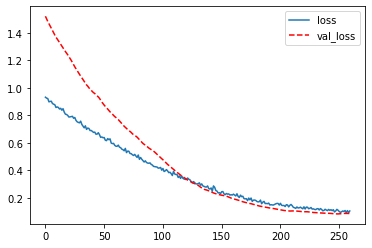

In [184]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

In [185]:
x_test = np.concatenate((fedfunds_test, gbond_test, ir_test, out_test, m2k_test, in_test, nj_test), axis=1)
y_test = np.array(kospi_test)

In [205]:
# 결과도출
result = model.predict(x_test)

In [206]:
result.shape

(39, 1)

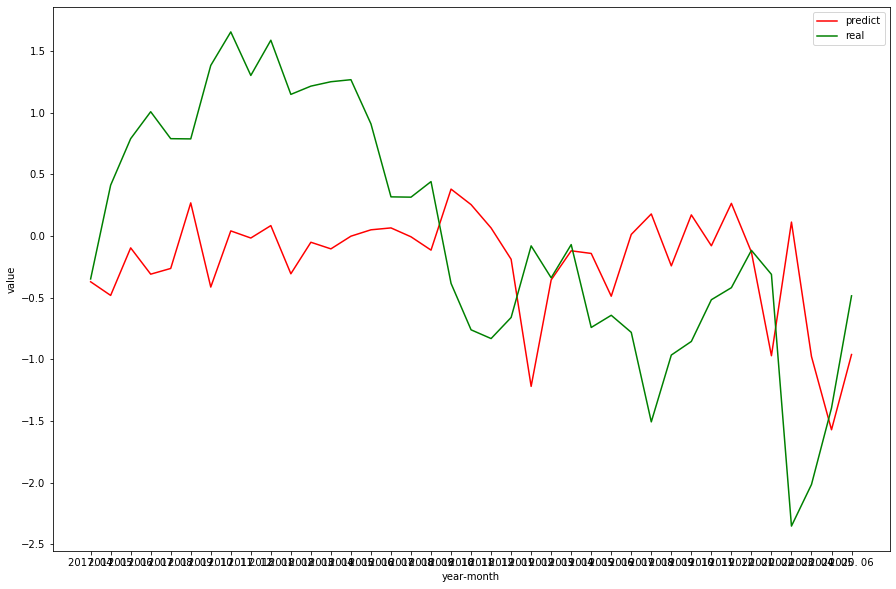

In [207]:
plt.figure(figsize=(15,10))
plt.plot(sp500_date, high_real_snp, 'r', label='high')
plt.plot(sp500_date, adjclose_real_snp, 'g', label='closeadj')
plt.plot(sp500_date, low_real_snp, 'b', label='low')
plt.xlabel('year-month')
plt.ylabel('value')
plt.legend()
plt.show()

In [208]:
result = std_scaler.inverse_transform(result)
result = min_max_scaler.inverse_transform(result)
result

array([[2155.943 ],
       [2135.3284],
       [2207.1812],
       [2167.4302],
       [2176.0815],
       [2275.1465],
       [2147.9353],
       [2232.7988],
       [2222.0562],
       [2240.8145],
       [2168.0376],
       [2215.652 ],
       [2205.667 ],
       [2224.837 ],
       [2234.4614],
       [2237.3328],
       [2223.8984],
       [2203.7627],
       [2295.9507],
       [2272.5273],
       [2237.2356],
       [2189.9282],
       [1997.8918],
       [2158.772 ],
       [2202.731 ],
       [2198.756 ],
       [2134.126 ],
       [2227.4734],
       [2258.4229],
       [2179.987 ],
       [2256.9893],
       [2210.309 ],
       [2274.4177],
       [2200.8105],
       [2044.1946],
       [2246.147 ],
       [2042.9896],
       [1932.3329],
       [2045.9819]], dtype=float32)